<a href="https://colab.research.google.com/github/nikhilbordekar/EDA-of-Play-Store-Data/blob/main/Capstone_1_Data_Analysis_of_Play_Store_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Play Store Data Analysis.



##### **Project Type**    - EDA
##### **Contribution**    - Team
##### **Team Member 1 -** Vinayak Gunjal
##### **Team Member 2 -** Nikhil Bordekar
##### **Team Member 3 -** Aniket Kale

# **Project Summary -**

1.   Collecting and cleaning data: The first step in the analysis process would be to collect and clean the data from the Play Store. This could involve cleaning and preprocessing the data to prepare it for analysis.
2.   Exploratory data analysis: Once the data has been collected and cleaned, the next step would be to perform exploratory data analysis (EDA) to understand the overall structure and patterns in the data. This could involve generating summary statistics, creating visualizations, and identifying trends and patterns in the data.
3.    Conclusion: Summarizing the key insights and recommendations based on the data, and presenting the results in a clear and understandable way.





# **GitHub Link -**

GitHun Link :- https://github.com/Vinayak0042

# **Problem Statement**


Understanding app usage and user behavior: This involve analyzing data on app downloads, user ratings, and other metrics to understand how users interact with different apps and what factors drive app success.

Understanding the competitive landscape: Analyzing data on app pricing and other characteristics can help developers understand the competitive landscape and identify opportunities for their own apps.

#### **Our Business Objective**


There are many potential business objectives that could be addressed through data analysis of the Google Play Store, including-

1.   Understanding app usage and user behavior.
2.   Identifying trends and patterns in app categories.
3.   Understanding the competitive landscape.
4.   Optimizing app pricing and monetization strategies.



## ***1. Knowing Data***

### Import Libraries

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import ast

### Dataset Loading

In [ ]:
# Loading Dataset
play_df=pd.read_csv("/content/Play Store Data.csv")

### Dataset First View

In [ ]:
# Dataset First Look
play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
play_df.shape

(10841, 13)

### Dataset Information

In [ ]:
# Dataset Info
play_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(play_df[play_df.duplicated()])

483

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
play_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

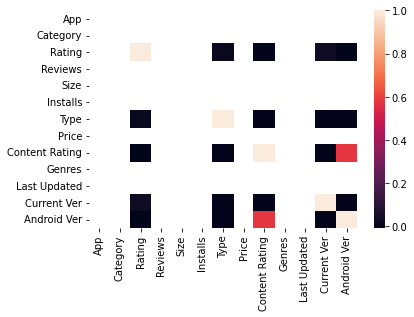

In [ ]:
# Visualizing the missing values
cor=play_df.isnull().corr()
sns.heatmap(cor)

### What we got to know about dataset?

The given dataset contains 10841 rows and 13 columns.Thier are total 483 duplicates in database. Most of the null values comes from the column Rating. Most of the data type is in string form except rating.

## ***2. Understanding Variables***

In [ ]:
# Dataset Columns
play_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# Dataset Describe
play_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Variables Description 



1.   App : Name of the Applications.
2.   Category : Category of various Applications.
3.   Rating : Ratings given by users (0 to 5).
4.   Reviews : Total number of reviews.
5.   Size  : Size of Application.
6.   Installs : Minimum number of installs of Application.
7.   Type : Type of Application (Free & Paid).
8.   Price : Price for paid Applications in USD.
9.   Content Rating : Type of users.
10.  Genres : Genre of Application.
11.  Last Updated : Last updated date of Application.
12.  Current ver : Current version of Application.
13.  Android ver : Required Android Version for Application.





### Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

column_list=list(play_df.columns)
dic={}
for column in column_list:
  b=list(play_df[column].unique())
  dic[column]=len(b)

dic




{'App': 9660,
 'Category': 34,
 'Rating': 41,
 'Reviews': 6002,
 'Size': 462,
 'Installs': 22,
 'Type': 4,
 'Price': 93,
 'Content Rating': 7,
 'Genres': 120,
 'Last Updated': 1378,
 'Current Ver': 2833,
 'Android Ver': 34}

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Cleaning of Dataset
play_df.drop(10472,inplace=True)

In [ ]:
# Removing duplicate values
play_df.drop_duplicates(inplace=True)

play_df.shape

(10357, 13)

In [ ]:
# Resetting index
play_df.reset_index(inplace=True)

In [ ]:
# Droping old index from dataset
play_df.drop("index",axis=1,inplace=True)

In [ ]:
# Convert installs which is in str into Numbers
def int_install(column):
  a=column.replace(",","")
  b=a.replace("+","")
  return int(b)

play_df["Installs in Number"]=play_df["Installs"].map(int_install)


In [ ]:
# Preparing code for data of category v/s installs
Cat_df=play_df.groupby("Category")["Installs in Number"].sum().reset_index()

Cat_df.rename(columns={"Installs in Number":"Downloads"},inplace=True)
Cat_df.sort_values("Downloads",ascending=False,inplace=True)


In [ ]:
# Code to get data of Game genres(Top Category) and Installs
top_cat=play_df[play_df["Category"]=="GAME"]

top_genre=top_cat.groupby("Genres")["Installs in Number"].sum().reset_index()
top_genre.rename(columns={"Installs in Number":"Downloads"},inplace=True)
top_genre.sort_values("Downloads",ascending=False,inplace=True)

In [ ]:
# Code to get data for Content Rating and Installs
cr_df=play_df.groupby("Content Rating")["Installs in Number"].sum().reset_index()

In [ ]:
# Code to get data of Paid apps and Installs
type_df=play_df[play_df["Type"]=="Paid"]
paid_df=type_df.groupby("Category")["Installs in Number"].sum().reset_index()
paid_df.sort_values("Installs in Number",ascending=False,inplace=True)



In [ ]:
# Code for getting top 10 prices which have most number of installs.
def price_conv(column):
  num=column.replace("$","")
  return float(num)

type_df["Price_n"]=type_df["Price"].map(price_conv)
reasop_df=type_df.groupby("Price_n")["Installs in Number"].sum().reset_index()
reasop_df.sort_values("Installs in Number",ascending=False,inplace=True)
top=reasop_df.head(10)

<ipython-input-22-4c91037b6148>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_df["Price_n"]=type_df["Price"].map(price_conv)


In [ ]:
# Code for corelation between Rating, Price, Installs, Size, Reviews.
heat_df=play_df[["Rating","Price","Installs in Number","Size","Reviews"]]

heat_df["Price in n"]=heat_df["Price"].map(price_conv)

h_df=heat_df[heat_df["Size"]!="Varies with device"]

def conv_k(column):
  if "k" in column:
    n=column[:-1]
    return float(n)/1024
  else:
    return float(column[:-1])
h_df["Reviews"]=h_df["Reviews"].astype(float)
h_df["size in MB"]=h_df["Size"].map(conv_k)



<ipython-input-23-845b9cc1238f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heat_df["Price in n"]=heat_df["Price"].map(price_conv)
<ipython-input-23-845b9cc1238f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_df["Reviews"]=h_df["Reviews"].astype(float)
<ipython-input-23-845b9cc1238f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

### Manipulations we have done and insights that we found

First we have removed all duplicates from the Data Set. Then we created a new column as Installs in Number where we took a minimum installs in int datatype. As you can see prices were in str data type with currency($), we have converted it into float data type for better analysis. Reviews also converted from str to int datatype. For sizes, all sizes were in KB and MB. We converted all sizes in MB for analysis.
All above operations we had done on the copy or slice of the original dataset.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understanding the relationships between variables***

#### Chart - 1

Text(0, 0.5, 'Downloads in 10 billion')

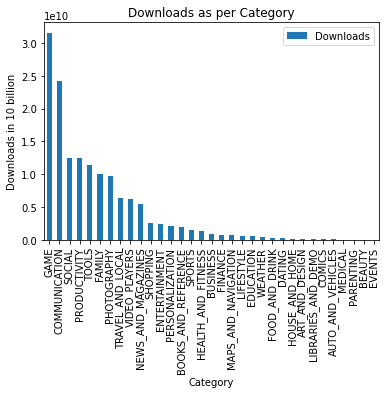

In [ ]:
# Chart - 1 visualization code
# Preparing code for data visualization between Category v/s installs
Cat_df.plot("Category", kind="bar")
plt.title("Downloads as per Category")
plt.xlabel("Category")
plt.ylabel("Downloads in 10 billion")

##### 1. Why we choose this specific chart?

1.   It can help you compare the popularity of different categories. By looking at the relative number of installs for each category, you can compare the relative popularity of different categories and see which ones are more popular.
2.   It can help you identify opportunities for new apps. If you notice that there are certain categories with relatively low numbers of installs, this may indicate an opportunity for new apps in those categories

Overall, a graph between category and installs can provide valuable insights into the popularity of different categories of apps on the Play Store, which can be useful for app developers, marketers, and other stakeholders.






##### 2.Insight(s) found from the chart

You may notice that certain categories of apps are more popular than others. For example, you may see that games and social media apps have the highest number of installs, while parenting or event apps have fewer installs.

##### 3. Positive and Negative impact from Insights of chart


1.   Identifying popular categories can help app developers create apps that are likely to be successful. By focusing on creating apps in categories that are in high demand, app developers can increase their chances of success.
2.   Identifying trends can help businesses stay ahead of the curve. For example, if you notice that certain categories of apps are becoming more popular, you can focus your efforts on creating apps in those categories, rather than in categories that are on the decline.
3.  Identifying opportunities for new apps can help businesses enter untapped markets. If you notice that there is demand for a certain type of app that is not being met, you may be able to create a successful app by filling that gap in the market.

Overall, the insights gained from analyzing a graph between category and installs for Play Store data can potentially help businesses make informed decisions that lead to a positive impact. However, it is important to note that there are many factors that can influence the success of an app, and the insights gained from this analysis should be considered alongside other relevant data and business objectives.


#### Chart - 2

Text(0, 0.5, 'Downloads in 10 billion')

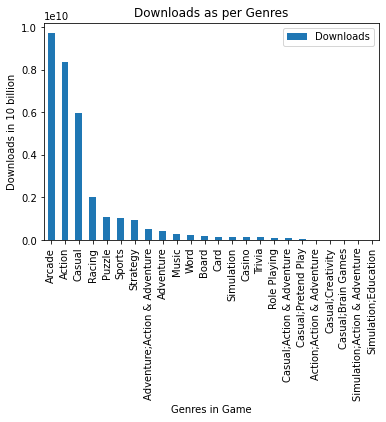

In [ ]:
# Chart - 2 visualization code
# Preparing code for data visualization between Game genres(Top Category) v/s installs
top_genre.plot("Genres",kind="bar")
plt.title("Downloads as per Genres")
plt.xlabel("Genres in Game")
plt.ylabel("Downloads in 10 billion")

##### 1. Why we choose this specific chart?

The first chart shows that the category with the highest downloads is games. We will now explore this category in great detail in this graph. by classifying game categories according to various genres. So now by help of specific chart we can analyze the demands of market. 

Though game has most installs, but it totally depends on various genres also.



##### 2. Insight(s) found from the chart



You may notice that certain Genres of Games are more popular than others. For example, you can see that Action, Arcade and Casual genres have the highest number of installs, while simulation or education genres have fewer installs.

##### 3.Positive and Negative impact from Insights of chart

As an app developer or company you can focus more on popular genres for the success of your Game. Also you can try to gain market in genres which are not performing well.

#### Chart - 3

Text(0, 0.5, 'Downloads in 100 Billion')

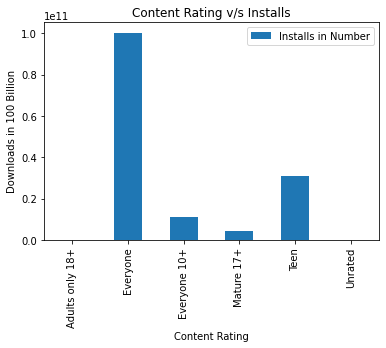

In [ ]:
# Chart - 3 visualization code
# Code for visualization between content rating and installs
cr_df.plot("Content Rating",kind="bar")
plt.title("Content Rating v/s Installs")
plt.xlabel("Content Rating")
plt.ylabel("Downloads in 100 Billion")

##### 1. Why we choose this specific chart?

It can help you understand which content ratings are associated with the most popular apps. By looking at the number of installs for each content rating, you can see which ratings are associated with the highest demand. This information can be valuable for app developers who want to create apps that are appropriate for a wide audience.

##### 2. Insight(s) found from the chart

By seeing chart we can say that the the app which has content suitable to everyone is best for business. Also you can target specific user to develop app in more effective manner.

#### Chart - 4

Text(0, 0.5, 'Downloads in 10 Million')

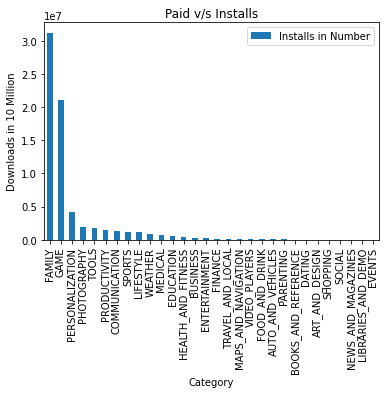

In [ ]:
# Chart - 4 visualization code
paid_df.plot("Category",kind="bar")
plt.title("Paid v/s Installs")
plt.xlabel("Category")
plt.ylabel("Downloads in 10 Million")

##### 1. Why we choose this specific chart?

As we know most of the companies keep their application free for users to acquire maximum number of engagement. But as a case of exception we want to explore paid categories in detail. 
In this chart we can see the trend in which category where the user is more willing to spend their money to install an application.


##### 2. Insight(s) found from the chart



We can see that as per chart the most paid category is Family and Game. So from this we can conclude that people are mostly intrested in paying for games and Family based applications.

##### 3.Positive and Negative impact from Insights of chart

It can be seen that keeping applications free is best for the success of your applications. but if you want to keep it paid you should try to focus more on game or family based application to minimize the consequences.

#### Chart - 5

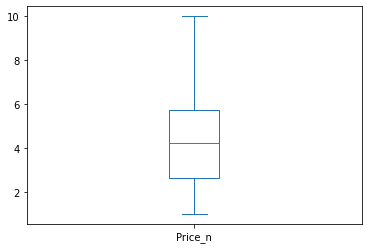

In [ ]:
# Chart - 5 visualization code
top.plot("Installs in Number",kind="box")

##### 1. Why we choose this specific chart?

After analyzing paid categories now we are trying to find the most suitable pricing by comparing prices vs install data. For the above chart we have considered the top 10 prices paid by the user. Here we have used the box plot to get a more self explanatory chart.

##### 2. Insight(s) found from the chart

By seeing above box plot we can see that about 50 % of users are more likely to pay money in between 2.30 to 6.00 USD. 

##### 3. Positive and Negative impact from Insights of chart

If Company wants to keep their product paid they must keep in mind about keeping the price between 2 to 6 USD.
As you can see, keeping the price above 10 USD would be a bad decision for Application. 

#### Chart - 6 - Correlation Heatmap

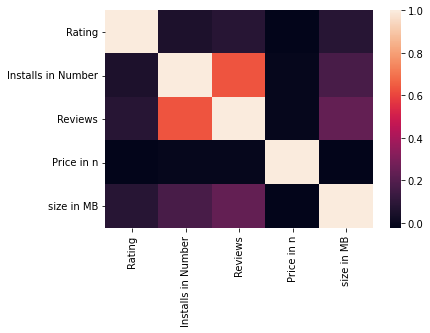

In [ ]:
# Correlation Heatmap visualization code
heat=h_df.corr()
sns.heatmap(heat)

##### 1. Why we choose this specific chart?

To show the corelation between different numeric component from Play Store Data. It will help us to understand the how different components affects each other.

##### 2. Insight(s) found from the chart

After visualizing the Heatmap it is apparent that price is the only independent entity which does not get affected by any other components from the data set. So there are some components which are minimally correlated with each other e.g Installs, size, Rating. Installs and Reviews are the only components which are dependent on each other.

## **5. Solution for Business Objective**

#### What are our suggestion for client to achieve Business Objective ? 


Our suggestion to client are as follows,
1. Choosing Category :  As by studying data about categories and Installs we would like to suggest focusing more on categories which are doing good in business that are Game, Social Media and Communication.
2. About Genres :  From top categories if you decided to go with game one. Then there will be a big question about which genre we need to go with. So for this we did an analysis as you know from that we can say that the games based on action, casual and arcade are doing better than others. Going with this genres will be beneficial for app and company also.
3. Paid or Free : After choosing category and genre now we need to decide whether we wanna go with free or paid version of our app. So as we all know, to reach maximum users we must keep our app free. But due to any complication you have in business, you want to keep it paid, then by analyzing  the data we can say that people are more interested in paying for Family and Game categorized applications. So going with games and family will be the best option for paid application.
4. Price : If you decided to bring a paid app then the main concern will be what should be a price for your application. From analyzing the data we can say that most people are paying around 1 to 10 USD. After  analyzing data in depth for 1 to 10 USD we found out that the best suitable range for any application will be between 2.30 USD to 6.00 USD.

Above mentioned factors are the most affecting factors for any application. It will be a halfway success after choosing this factors correctly.


# **Conclusion**

From analyzing Play Store Data we hereby conclude that users are more interested in Games, Social media and Communication applications. For games specific users would like to have action based, arcade and casual kind of games. When it comes to money people mostly prefer free applications and about paid they go for minimal prices like form 1 to 10 USD. So these are some major factors affecting the success of any application. Their are some other factors like Size and Android version which does not have much effect on business.
There's one more factor which is essential for success is user review. For that we need to do separate analysis based on it.
